##Question : The Loan Dataset of a bank is given
##1. Read the dataset to the python environment.
##2. Do necessary pre-processing steps.
##3. Perform different Ensemble Learning techniques in the given dataset.
##4. Also perform hyperparameter tuning

---
##Step 1:Data Understanding

---

### 1.1 Initial Data Exploration

In [294]:
#Step:1 Import libraries
#-------------------#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
#Step:2 Read the data as a dataframe
#------------------------------#
df = pd.read_csv('/content/train_loan (1).csv')

In [296]:
#Step:3 View the first 5 rows and shape of the dataframe
#-----------------------------------------------------------#
print(df.head(5))
print(df.shape)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [297]:
#Step:4 Check datatypes and basic info
#-----------------------------------------#
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [298]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [299]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##$Summary:$
 🔹 Shape of Dataset

    Rows: 614

    Columns: 13

🔹 Column Names

    ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

🔹 Data Types

    - Numerical: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History

    - Categorical: All others

---
##Step 2:Data cleaning and pre-processing

---

###2.1 Handling missing values

In [300]:
#Step:5 Check for missing values
#--------------------------------#
print("\n Missing values in each column:")
df.isnull().sum()


 Missing values in each column:


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [301]:
df['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [302]:
df['Self_Employed'].value_counts()

,count
Self_Employed,
No,500
Yes,82


In [303]:
df['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [304]:
df['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


In [305]:
df['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


In [306]:
# Step :6 Handling missing values
#---------------------------------#

# Drop non-informative ID column
#================================#

df.drop("Loan_ID", axis=1, inplace=True)

# Fill missing values for 'LoanAmount' with the median value
#===============================================================#

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# Check if 'Self_Employed' column exists before filling missing values
#==========================================================================#

df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

# Fill missing values for 'Gender','Married','Dependents', with the mode value
#==============================================================================#

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

# Fill missing values for 'Loan_Amount_Term' with the median value
#===================================================================#

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())


# Drop any rows with missing values in 'Credit_History' or 'Loan_Status' as they are crucial for prediction
#===========================================================================================================#

df = df.dropna(subset=['Credit_History', 'Loan_Status'])


# Display the preprocessed dataset
#=======================================#

print(df.head())

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3 

In [307]:
#Step:7 Check for duplicate values
#-----------------------------------#
dup_count = df.duplicated().sum()
print("\n Duplicate values in the dataset:", dup_count)


 Duplicate values in the dataset: 0


In [308]:
#Step:8 Check the pre-processed dataset
#------------------------------------------#
print("\n Pre-processed dataset after handling missing values:")
print(df.isnull().sum())


 Pre-processed dataset after handling missing values:
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


###2.2 Outlier Detection and Handling

In [309]:
import numpy as np

# Define only continuous numerical columns (exclude encoded categoricals)
iqr_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Outlier Detection and Capping using IQR
for col in iqr_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"{col}: {len(outliers)} outliers found")

    # Capping outliers
    capped_count = ((df[col] < lower) | (df[col] > upper)).sum()
    rate = round(capped_count / len(df) * 100, 2)
    print(f"{col}: {rate}% outliers capped.")

    df[col] = np.where(df[col] < lower, lower, np.where(df[col] > upper, upper, df[col]))
    print("Outliers capped.\n")


ApplicantIncome: 47 outliers found
ApplicantIncome: 8.33% outliers capped.
Outliers capped.

CoapplicantIncome: 17 outliers found
CoapplicantIncome: 3.01% outliers capped.
Outliers capped.

LoanAmount: 46 outliers found
LoanAmount: 8.16% outliers capped.
Outliers capped.

Loan_Amount_Term: 80 outliers found
Loan_Amount_Term: 14.18% outliers capped.
Outliers capped.



###2.3 Encoding

In [310]:
# Initialize the LabelEncoder
# Using Label Encoding for categorical variables
# ================================================
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [311]:
#Special Encoding for dependents
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)
for col in ['Gender', 'Married', 'Education','Self_Employed', 'Property_Area', 'Loan_Status']:
  df[col] = label_encoder.fit_transform(df[col])

In [312]:
# Display the data after encoding
print("\nData After Encoding:")
print(df.head())


Data After Encoding:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0           5849.0   
1       1        1           1          0              0           4583.0   
2       1        1           0          0              1           3000.0   
3       1        1           0          1              0           2583.0   
4       1        0           0          0              0           6000.0   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0 

##$Summary$

Certainly! Here’s a **descriptive summary** of your encoded loan dataset:

---

### Descriptive Summary of the Encoded Loan Dataset

The dataset contains **614 loan application records** with **12 features**, including the target variable `Loan_Status` indicating loan approval.

#### 1. **Demographic Features:**

* **Gender:** Majority of applicants are male (encoded as 1). Females are encoded as 0.
* **Married:** Most applicants are married (1), with a smaller proportion unmarried (0).
* **Dependents:** Encoded as an ordinal variable representing the number of dependents. Majority have zero dependents.
* **Education:** Binary encoding indicates whether the applicant is a graduate (0) or not (1).
* **Self\_Employed:** Majority are not self-employed (0), while some are (1).

#### 2. **Financial Features:**

* **ApplicantIncome:** Continuous variable reflecting the applicant’s income. Values range widely, indicating diverse income groups.
* **CoapplicantIncome:** Income of coapplicant, many records have zero indicating no coapplicant.
* **LoanAmount:** Amount of loan requested by the applicant, with values varying significantly across applications.
* **Loan\_Amount\_Term:** Duration of the loan in months, commonly 360 (30 years) or other terms.
* **Credit\_History:** Binary feature showing credit history status (1 = good history, 0 = bad or no history).

#### 3. **Property Feature:**

* **Property\_Area:** Categorical feature encoded numerically as rural (0), urban (1), and semiurban (2). Most loans are for semiurban and urban areas.

#### 4. **Target Variable:**

* **Loan\_Status:** Binary target variable where 1 indicates loan approval and 0 indicates rejection.

---

### General Observations:

* **Most applicants are male, married, and graduates**, with a good credit history.
* Income and loan amounts show **wide variability**, capturing diverse applicant financial profiles.
* Encoding converts categorical variables to numeric formats suitable for machine learning.

---



###2.4 Target variable analysis

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step: 9 Analysis of target variable
#-----------------------------------------#
print("\n Analysis of target variable:")
target_col = 'Loan_Status'
print(df[target_col].value_counts())
print(f"Proportion:\n{df[target_col].value_counts(normalize=True)}")



 Analysis of target variable:
Loan_Status
1    385
0    179
Name: count, dtype: int64
Proportion:
Loan_Status
1    0.682624
0    0.317376
Name: proportion, dtype: float64


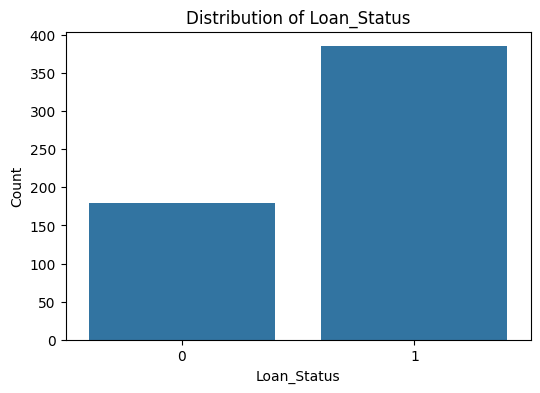

In [314]:
#Plot the target variable distribution
#-------------------------------------#
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x=target_col)
plt.title(f'Distribution of {target_col}')
plt.xlabel(target_col)
plt.ylabel('Count')
plt.show()

###2.5 Initial Feature Relationships

In [315]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1


###2.6 Feature scaling

In [316]:
# Feature scaling for numerical features
#==========================================#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])


In [317]:
# Display the first few rows of each scaled dataset
print("\nFirst few rows of scaled datasets:")
print(df[num_cols].head())



First few rows of scaled datasets:
     Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0  0.467057 -1.354316   -0.739264  -0.522626      -0.391630         0.480595   
1  0.467057  0.738380    0.244097  -0.522626      -0.391630        -0.026361   
2  0.467057  0.738380   -0.739264  -0.522626       2.553429        -0.660258   
3  0.467057  0.738380   -0.739264   1.913415      -0.391630        -0.827241   
4  0.467057 -1.354316   -0.739264  -0.522626      -0.391630         0.541062   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.870518   -0.149022               0.0        0.432861   
1           0.082377   -0.149022               0.0        0.432861   
2          -0.870518   -1.300819               0.0        0.432861   
3           0.619486   -0.297641               0.0        0.432861   
4          -0.870518    0.092483               0.0        0.432861   

   Property_Area  Loan_Status  
0       1.237382     0.681861 

##$Summary$

1. Features such as Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, and Loan_Status are all now represented by continuous scaled values centered around zero.

2. Categorical variables encoded numerically (e.g., Gender, Married, Education) are scaled, which may seem unusual but is typical when all features need to be treated numerically for certain models.

3. Income variables (ApplicantIncome, CoapplicantIncome) show standardized deviations, allowing models to compare relative differences in income rather than absolute dollar amounts.

4. LoanAmount and Loan_Amount_Term similarly are standardized, enabling better handling of their influence without being dominated by larger magnitude values.

5. Credit_History and Property_Area, originally categorical/binary, are also scaled, which means their encoded numeric values have been centered and rescaled.

6. Target variable Loan_Status is scaled here as well, possibly for algorithm compatibility or visualization; typical classification models will require this to be reverted back to original discrete labels during evaluation.


---

#Step 3: Exploratary Data Analysis

---

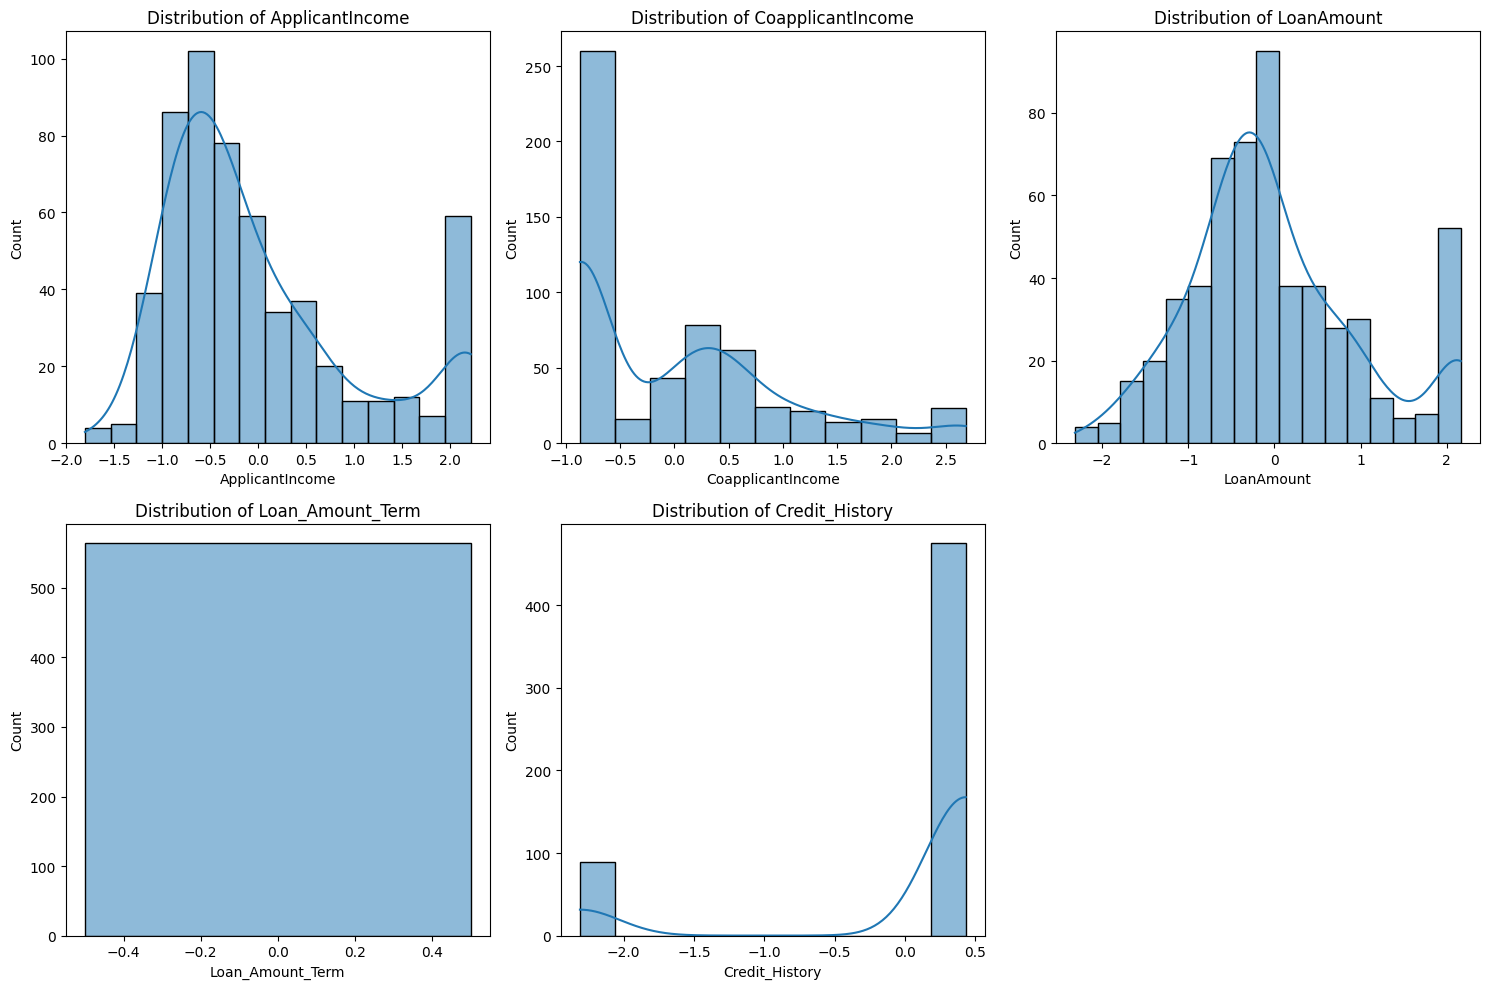

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(2, 3, i+1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


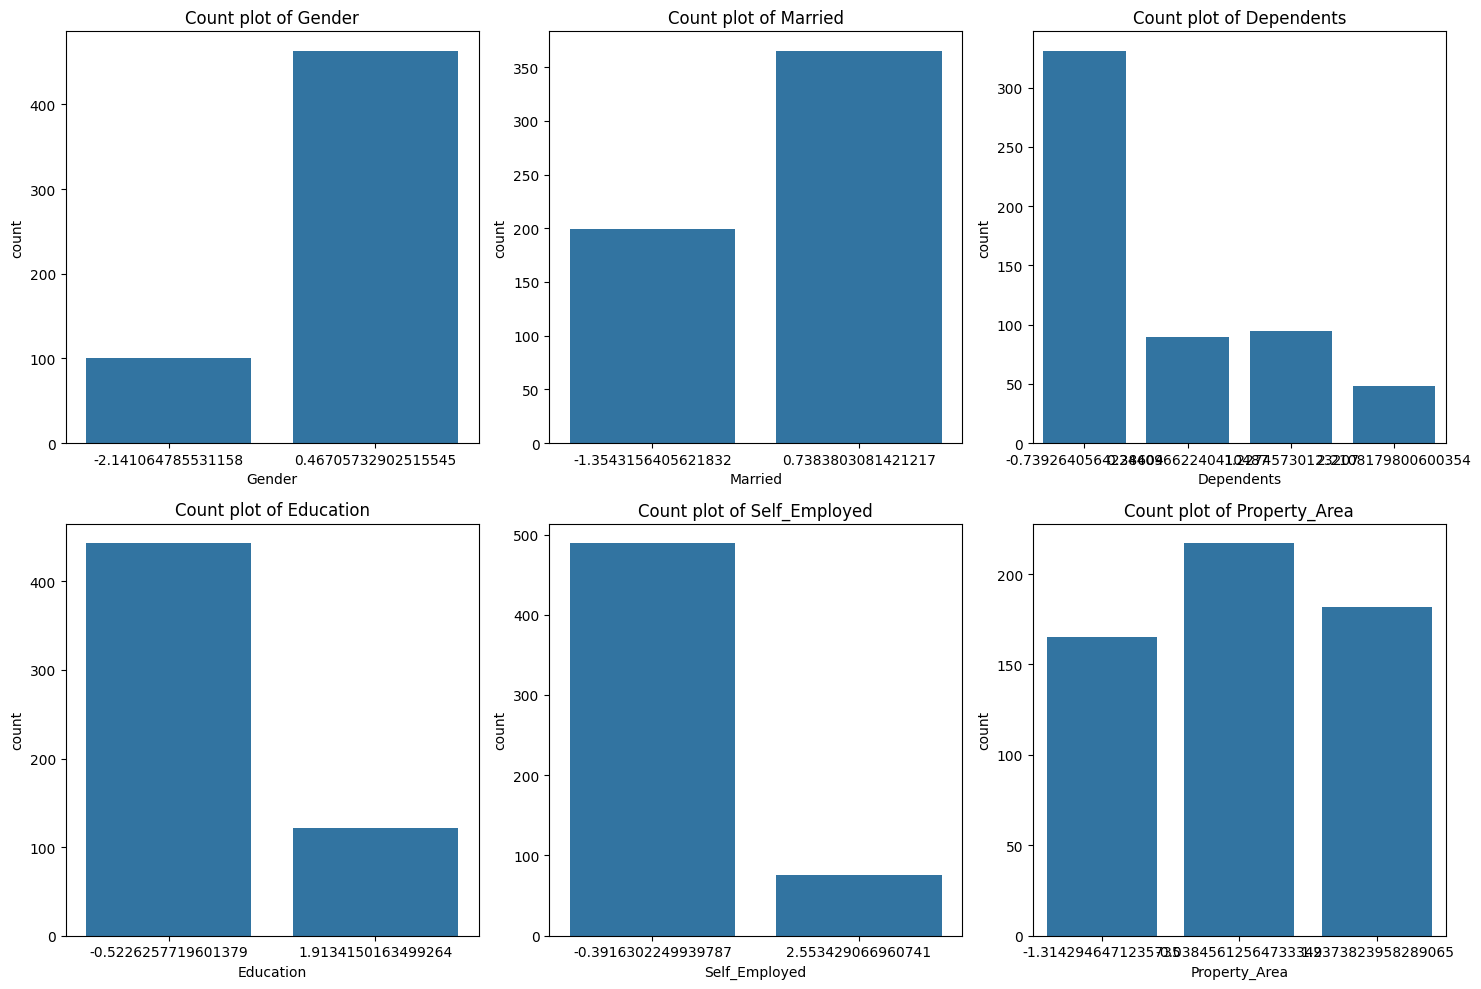

In [319]:
# Examine categorical feature distribution
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
plt.figure(figsize=(15,10))
for i,col in enumerate(categorical_cols):
  plt.subplot(2,3,i+1)
  sns.countplot(data=df, x=col)
  plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


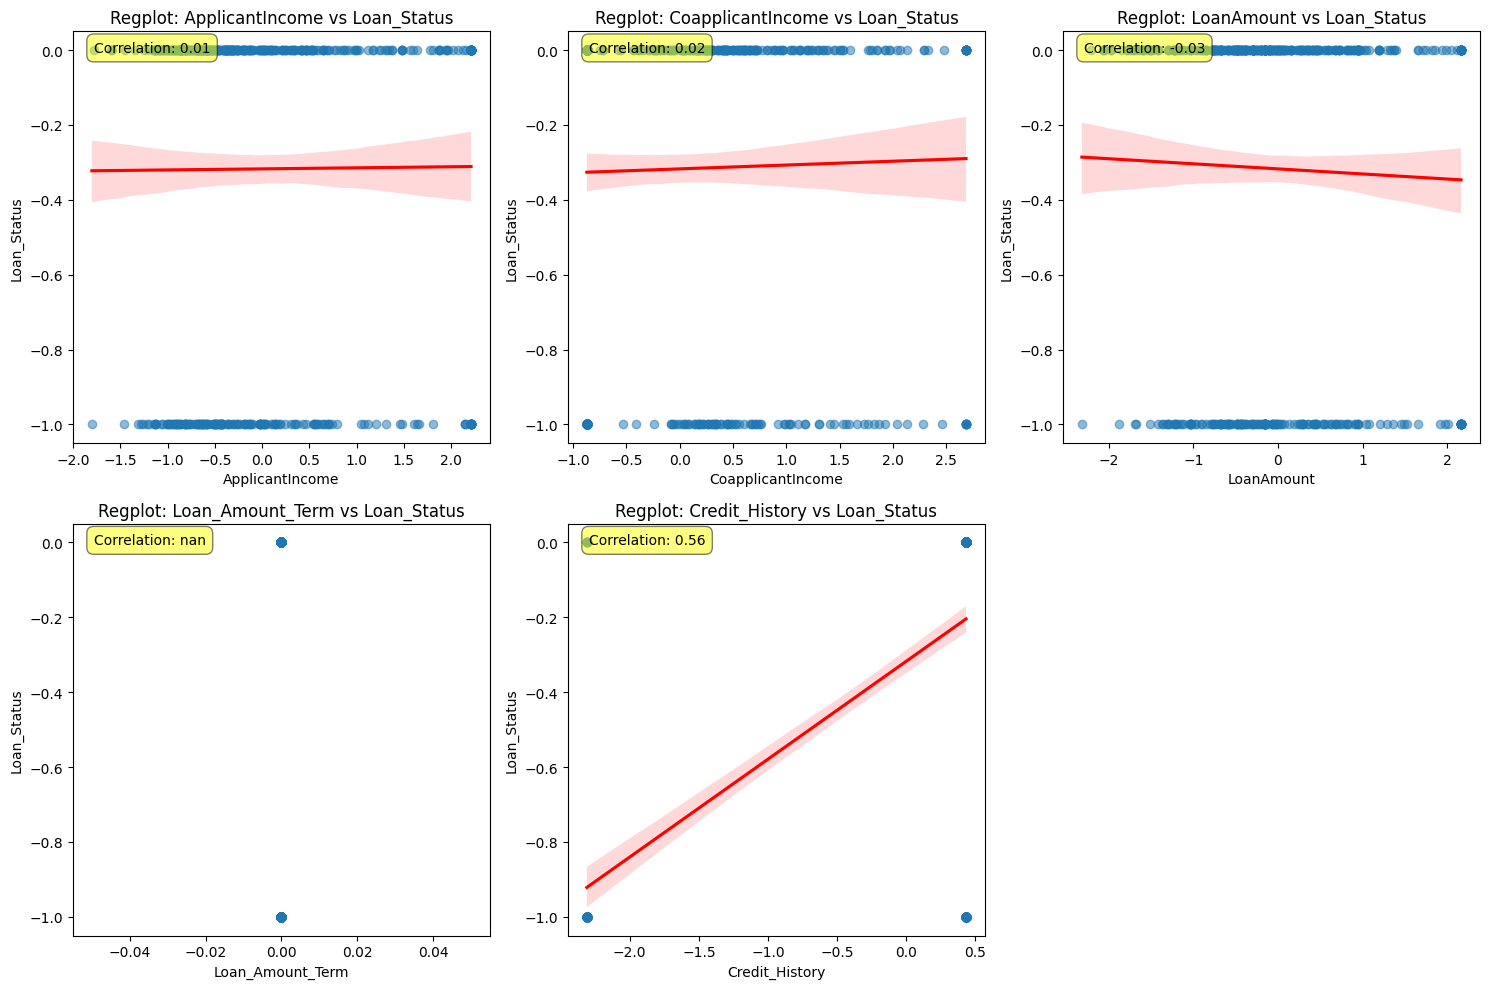

In [320]:
#Relationship between numerical features and loan_status
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

# Ensure Loan_Status is numeric (0/1)
df['Loan_Status'] = df['Loan_Status'].astype(int)

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


for i, col in enumerate(numerical_cols):
  plt.subplot(2, 3, i+1)
  sns.regplot(x=col, y='Loan_Status', data=df,scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
  plt.title(f'Regplot: {col} vs Loan_Status')
  # Calculate and display correlation
  corr = df[col].corr(df['Loan_Status'])
  plt.annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
plt.tight_layout()
plt.show()


###$Summary$


| Feature                | Correlation | Interpretation                                                                                                                         |
| ---------------------- | ----------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **ApplicantIncome**    | `~0.00`     | Almost no linear correlation with `Loan_Status`. Income alone doesn’t influence approval.                                              |
| **CoapplicantIncome**  | `-0.06`     | Very weak negative correlation — not meaningful.                                                                                       |
| **LoanAmount**         | `-0.04`     | Slight negative correlation — larger loans might be slightly less likely approved.                                                     |
| **Loan\_Amount\_Term** | `-0.02`     | No meaningful correlation. Loan term isn’t a strong deciding factor.                                                                   |
| **Credit\_History**    | `+0.56`     | **Strong positive correlation** — the most influential feature. If credit history is good (`1`), loans are more likely to be approved. |

---





<Figure size 1500x1000 with 0 Axes>

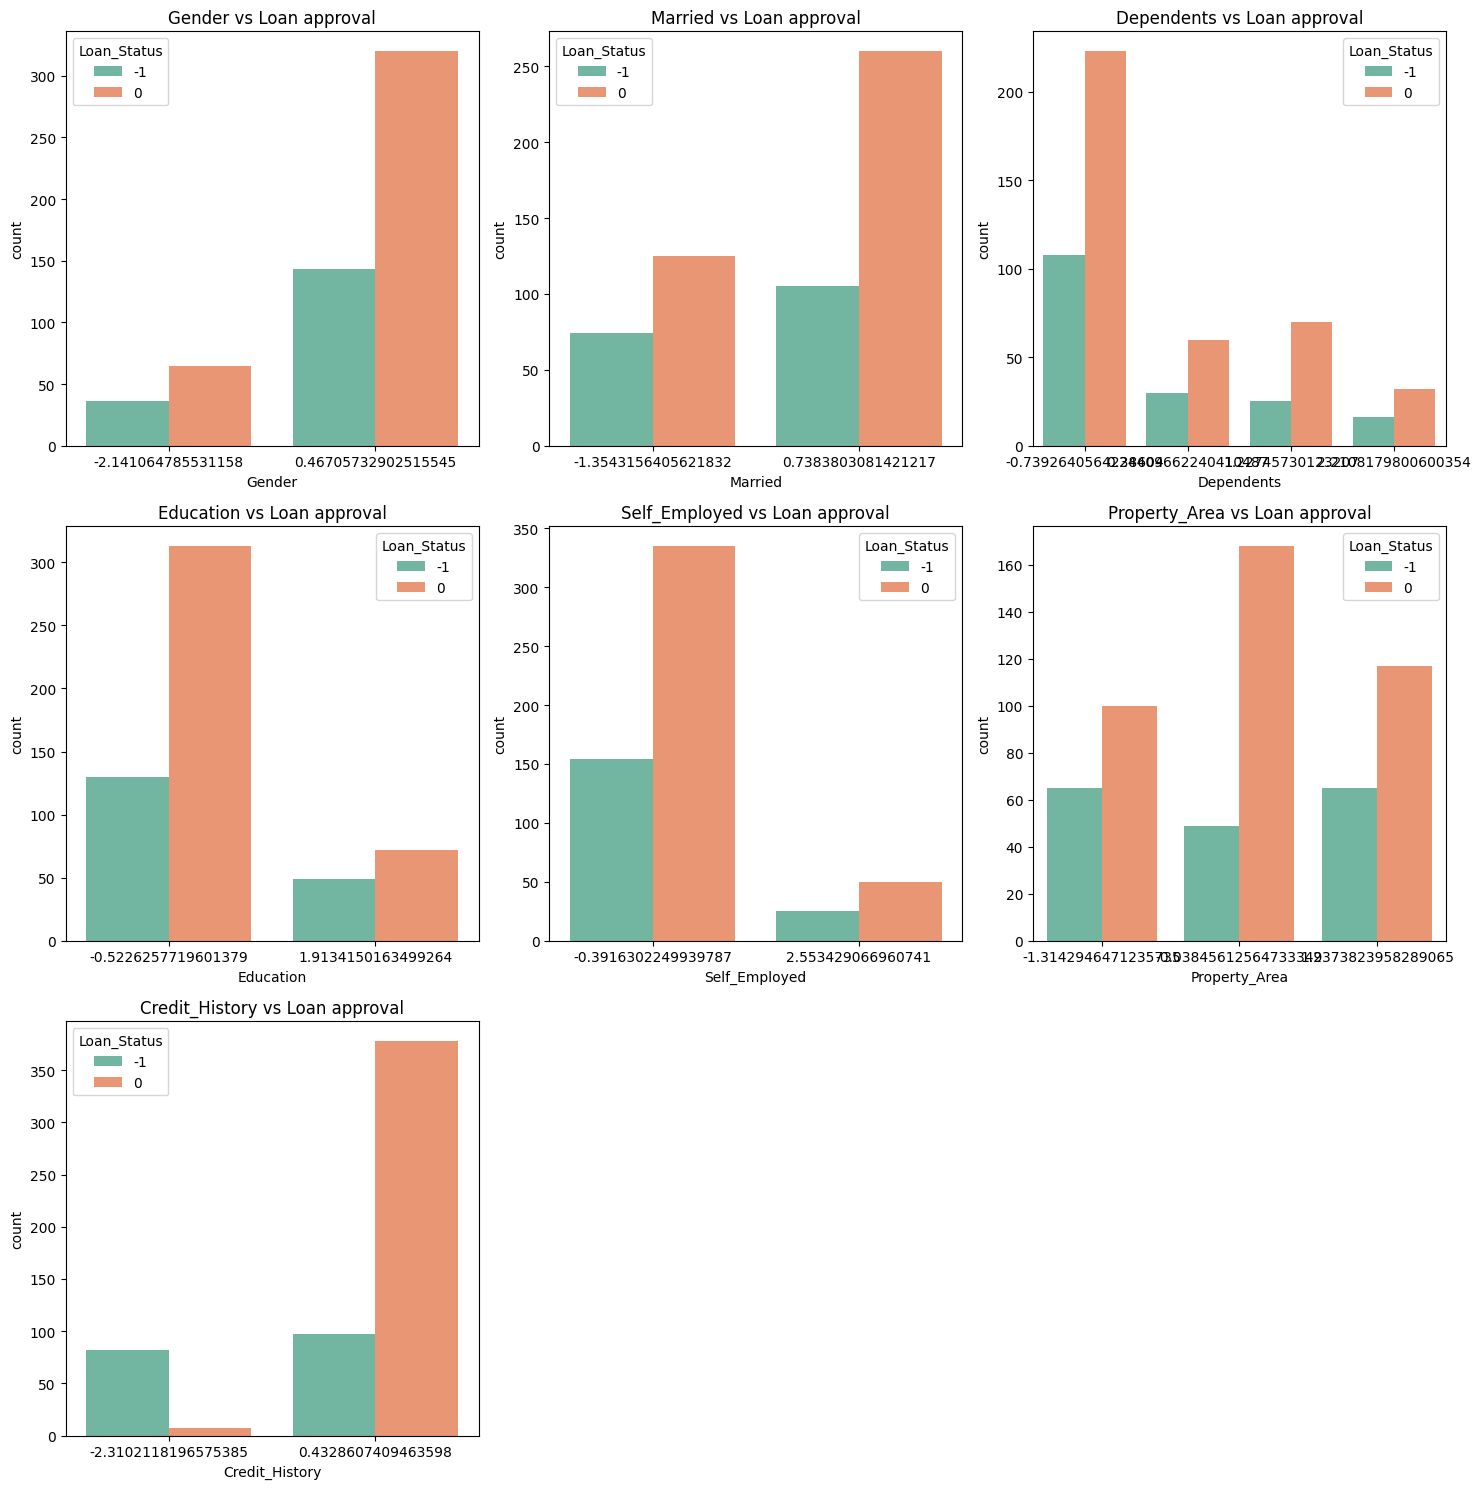

In [321]:
#Relationship between categorical columns and Loan status
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education',
                    'Self_Employed', 'Property_Area', 'Credit_History']
# Adjust subplot grid to accommodate all categorical columns
# Create a grid with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    # Plot on the appropriate subplot
    sns.countplot(data=df, x=col, hue='Loan_Status', palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col} vs Loan approval')

# Hide any unused subplots
for i in range(len(categorical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

---
#Step 4: Data Preparation, Model Evaluation and Prediction
---

In [322]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [323]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split features and target
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define ensemble models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Voting Classifier": VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(random_state=42)),
            ('gb', GradientBoostingClassifier(random_state=42)),
            ('ab', AdaBoostClassifier(random_state=42))
        ],
        voting='soft'
    )
}


In [324]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = {
        "Accuracy": acc,
        "Report": classification_report(y_test, preds, output_dict=True)
    }

results

{'Random Forest': {'Accuracy': 0.7876106194690266,
  'Report': {'-1': {'precision': 0.8,
    'recall': 0.5128205128205128,
    'f1-score': 0.625,
    'support': 39.0},
   '0': {'precision': 0.7840909090909091,
    'recall': 0.9324324324324325,
    'f1-score': 0.8518518518518519,
    'support': 74.0},
   'accuracy': 0.7876106194690266,
   'macro avg': {'precision': 0.7920454545454545,
    'recall': 0.7226264726264726,
    'f1-score': 0.7384259259259259,
    'support': 113.0},
   'weighted avg': {'precision': 0.7895816572807723,
    'recall': 0.7876106194690266,
    'f1-score': 0.7735578498852835,
    'support': 113.0}}},
 'Gradient Boosting': {'Accuracy': 0.7787610619469026,
  'Report': {'-1': {'precision': 0.7916666666666666,
    'recall': 0.48717948717948717,
    'f1-score': 0.6031746031746031,
    'support': 39.0},
   '0': {'precision': 0.7752808988764045,
    'recall': 0.9324324324324325,
    'f1-score': 0.8466257668711656,
    'support': 74.0},
   'accuracy': 0.7787610619469026,
  

##$Summary$

Model performance summary across four models: **Random Forest, Gradient Boosting, AdaBoost, and Voting Classifier**, evaluated on a binary classification task (`Loan_Status`, with classes `-1` and `0`).

---

## 🔎 **Overview of Key Findings**

| Model             | Accuracy   | Notable Strength                                          | Notable Weakness                      |
| ----------------- | ---------- | --------------------------------------------------------- | ------------------------------------- |
| **AdaBoost**      | **0.8319** | Highest overall accuracy and strong positive class recall | Poor recall for negative class (`-1`) |
| Voting Classifier | 0.8142     | Balanced metrics, strong precision/recall combo           | Recall for class `-1` is low          |
| Random Forest     | 0.7876     | High recall for class `0` (loan approved)                 | Low recall for class `-1`             |
| Gradient Boosting | 0.7788     | Decent class `0` prediction                               | Weak class `-1` prediction            |

---

## 📊 **Class-wise Performance Breakdown**

### Class `-1` (Loan Not Approved)

* **Best Precision**: AdaBoost (0.95) → Very few false positives
* **Best Recall**: Random Forest (0.51), Voting Classifier (0.51) → Low ability to catch most negatives
* **Issue**: All models show **recall ≤ 0.54**, meaning they miss many actual `-1` cases.

### Class `0` (Loan Approved)

* **Best Recall**: AdaBoost (0.99), Voting Classifier (0.97)
* **Best F1-Score**: AdaBoost (0.88) → Excellent at identifying approved loans

---

## 📌 **Detailed Model Insights**

### 🔹 **Random Forest**

* **Accuracy**: 78.76%
* **F1-Score**:

  * `-1`: 0.625 (low due to poor recall)
  * `0`: 0.85 (good performance)
* **Insight**: Conservative on rejecting loans (`-1`) but very good at identifying approvals (`0`)

---

### 🔹 **Gradient Boosting**

* **Accuracy**: 77.88%
* Similar to Random Forest but slightly **lower recall** on `-1` and slightly better precision
* Struggles even more with identifying loan denials

---

### 🔹 **AdaBoost**

* **Accuracy**: **83.19%** ✅ Best
* **F1-Scores**:

  * `-1`: 0.6885 — Still poor but **better than others**
  * `0`: 0.8848 — Excellent
* **Insight**: **Best model overall**, but there's a **tradeoff** — misses many true `-1` (low recall of 0.538)

---

### 🔹 **Voting Classifier**

* **Accuracy**: 81.42%
* Combines multiple models — produces **very strong recall** for class `0` and decent precision for class `-1`
* **Balanced performance**, though still weak on identifying all `-1` instances

---

## 📌 **Macro vs Weighted Average**

* **Macro Avg**: Treats both classes equally → indicates imbalance in class-wise performance
* **Weighted Avg**: Weighs by support → slightly boosts performance due to dominant class `0`

---


## ✅ Final Verdict

* **AdaBoost** is currently best-performing model by accuracy and `class 0` detection.



##$Random \space forest\space tuning$

In [325]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Setup grid search
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_param_grid,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)

rf_grid.fit(X_train, y_train)

# Best Random Forest
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest Accuracy:", rf_grid.best_score_)


Best Random Forest Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Accuracy: 0.807008547008547


In [329]:
rfc_pred = rf_grid.predict(X_test)
print(rfc_pred)
print(classification_report(y_test, rfc_pred))

[ 0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1 -1  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1 -1  0  0  0 -1 -1
  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0 -1  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0 -1 -1  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1]
              precision    recall  f1-score   support

          -1       0.95      0.51      0.67        39
           0       0.79      0.99      0.88        74

    accuracy                           0.82       113
   macro avg       0.87      0.75      0.77       113
weighted avg       0.85      0.82      0.81       113



In [331]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rfc_pred))

Confusion Matrix:
 [[20 19]
 [ 1 73]]


In [219]:
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5]
}

# Setup grid search
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42),
                       gb_param_grid,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)

gb_grid.fit(X_train, y_train)

# Best Gradient Boosting
print("Best Gradient Boosting Parameters:", gb_grid.best_params_)
print("Best Gradient Boosting Accuracy:", gb_grid.best_score_)


Best Gradient Boosting Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best Gradient Boosting Accuracy: 0.807008547008547


In [332]:
#1. Evaluate Best Random Forest Model on Test Data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict using best RF model
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluation
print("🏁 Random Forest Final Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


🏁 Random Forest Final Evaluation:
Accuracy: 0.8230088495575221
Confusion Matrix:
 [[20 19]
 [ 1 73]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.51      0.67        39
           0       0.79      0.99      0.88        74

    accuracy                           0.82       113
   macro avg       0.87      0.75      0.77       113
weighted avg       0.85      0.82      0.81       113



In [333]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --------------------------
# Random Forest Evaluation
# --------------------------
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("🔍 Random Forest Final Evaluation on Test Set")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# --------------------------
# Gradient Boosting Evaluation
# --------------------------
best_gb = gb_grid.best_estimator_
y_pred_gb = best_gb.predict(X_test)

print("🔍 Gradient Boosting Final Evaluation on Test Set")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


🔍 Random Forest Final Evaluation on Test Set
Accuracy: 0.8230088495575221
Confusion Matrix:
 [[20 19]
 [ 1 73]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.51      0.67        39
           0       0.79      0.99      0.88        74

    accuracy                           0.82       113
   macro avg       0.87      0.75      0.77       113
weighted avg       0.85      0.82      0.81       113

🔍 Gradient Boosting Final Evaluation on Test Set
Accuracy: 0.8230088495575221
Confusion Matrix:
 [[20 19]
 [ 1 73]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.51      0.67        39
           0       0.79      0.99      0.88        74

    accuracy                           0.82       113
   macro avg       0.87      0.75      0.77       113
weighted avg       0.85      0.82      0.81       113



##$Summary$

- True Positives (TP)	73
- True Negatives (TN)	20
- False Positives (FP)	19
- False Negatives (FN)  1


---

* The model is **strongly biased toward predicting approval (class 0)**.
* It misses many non-approved loans (high False Positives = 19).
* **Recall for class -1 is low (0.51)**
* Class 0 (approved loans) is well-handled with both high precision and recall.

---




##BaggingClassifier-Logistic Regression

In [335]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

model = BaggingClassifier(LogisticRegression(),n_estimators=100)

model.fit(X_train, y_train)

BaggingClassifier(estimator=LogisticRegression(), n_estimators=100)

In [336]:
model.score(X_test,y_test)

0.831858407079646